In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import json
import ast

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')  

import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')

from wordcloud import WordCloud
from nrclex import NRCLex
from textblob import TextBlob

#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lisa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lisa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lisa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lisa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lisa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
spotify_lyrics = pd.read_csv('datasets/lyrics/lyrics.csv')


## Store lyrics into words, and clean them by stopwords

In [ ]:
spotify_lyrics

In [ ]:
spotify_lyrics['year'].value_counts()

In [ ]:
spotify_lyrics['lyrics'] = spotify_lyrics['lyrics'].map(str)
"""
Cleaning the year data
spotify_lyrics['song_id'] = spotify_lyrics['song_id'].map(str)

year = []
for y in spotify_lyrics['song_id']:
    year.append(y[0:4])
    
spotify_lyrics['year'] = year
"""
spotify_lyrics.dtypes
spotify_lyrics

In [ ]:
"""
spotify_lyrics['year'] = spotify_lyrics['year'].replace('nan', 0)
spotify_lyrics['year'] = spotify_lyrics['year'].map(int)
"""
spotify_lyrics["year"].value_counts()

In [ ]:
def clean_lyrics(df,column):
    """
    This function cleans the words without importance and fix the format of the  dataframe's column lyrics 
    parameters:
    df = dataframe
    column = name of the column to clean
    """
    df = df
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace(r"verse |[1|2|3]|chorus|bridge|outro","").str.replace("[","").str.replace("]","")
    df[column] = df[column].str.lower().str.replace(r"instrumental|intro|guitar|solo","")
    df[column] = df[column].str.replace("\n"," ").str.replace(r"[^\w\d'\s]+","").str.replace("efil ym fo flah","")
    df[column] = df[column].str.strip()
    return df


In [ ]:

def lyrics_to_words(document):
    """
    This function splits the text of lyrics to  single words, removing stopwords and doing the lemmatization to each word
    parameters:
    document: text to split to single words
    """
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

In [ ]:
def create_decades(df):
    """
    This function creates a new column called decades used to group the songs and lyrics by decade based on the date released 
    for each song
    parameters:
    df = dataframe
    """
    """
    years = []
    decades = []
    df['date'].fillna(0)
    df['date'] = df['date'].astype("str")
    for i in df.index:
        years.append(df['date'].str.split("-")[i][0])
    df['year'] = years
    """
   # df['year'] = df['year'].astype("int")
    decades = []
    
    for year in df['year']:
       # if year == "":
       #     decades.append("")
        if 1949 < year < 1960:
            decades.append("50s")
        if 1959 < year < 1970:
            decades.append("60s")
        if 1969 < year < 1980:
            decades.append("70s")
        if 1979 < year < 1990:
            decades.append("80s")
        if 1989 < year < 2000:
            decades.append("90s")
        if 1999 < year < 2010:
            decades.append("00s")
        if 2009 < year < 2020:
            decades.append("10s")
        if 2019 < year:
            decades.append("20s")
    df['decade'] = decades
    return df

In [ ]:
#cleaning and transforming lyrics
spotify_lyrics = clean_lyrics(spotify_lyrics,'lyrics')
spotify_lyrics = create_decades(spotify_lyrics)

In [ ]:
spotify_lyrics

In [ ]:
sample = [["lyric", "is", "num"], ["q", "lyric", "type"], ["f", "p"]]
correct_sample = []

for wl in sample:
    if "lyric" in wl:
        n = wl.index("lyric")
        correct_sample.append(wl[(n + 1):])
    else:
        correct_sample.append(wl)
        
correct_sample    

In [ ]:
#Stores unique words of each lyrics song into a new column called words 

#list used to store the words
words = []
#iterate trought each lyric and split words appending the result into the words list
spotify_lyrics = spotify_lyrics.reset_index(drop=True)
for word in spotify_lyrics['lyrics'].tolist():
    words.append(lyrics_to_words(word).split())

correct_words = []
for wl in words:
    if "lyric" in wl:
        n = wl.index("lyric")
        correct_words.append(wl[(n + 1):])
    else:
        correct_words.append(wl)



#create the new column with the information of words lists 
spotify_lyrics['words'] = correct_words



In [ ]:
spotify_lyrics

In [ ]:

#Save the data into a csv file
spotify_lyrics.to_csv('lyrics_sep.csv',index=False)

## Lyrics clouding

In [2]:
spotify_lyrics = pd.read_csv("lyrics_sentiment.csv")

In [3]:
spotify_lyrics

index        date  rank                            title  \
0          0  1958-08-11     1                 Poor Little Fool   
1          1  1958-08-11     2  Nel Blu Dipinto Di Blu (Volare)   
2          2  1958-08-11     3                         Patricia   
3          3  1958-08-11     4                    Splish Splash   
4          4  1958-08-11     5                             When   
...      ...         ...   ...                              ...   
29926  29926  2022-04-09    59                      Make Up Sex   
29927  29927  2022-04-09    73                     X Ultima Vez   
29928  29928  2022-04-09    74                         Envolver   
29929  29929  2022-04-09    80                          Chaotic   
29930  29930  2022-04-09    89                            Sigue   

                              artist  year        song_id  \
0                       Ricky Nelson  1958   1958-08-11_1   
1                   Domenico Modugno  1958   1958-08-11_2   
2      Perez Prado And His Orchestra  1958   1958-08-11_3   
3                        Bobby Darin  1958   1958-08-11_4   
4                        Kalin Twins  1958   1958-08-11_5   
...                              ...   ...            ...   
29926  Machine Gun Kelly X blackbear  2022  2022-04-09_59   
29927       Daddy Yankee & Bad Bunny  2022  2022-04-09_73   
29928                         Anitta  2022  2022-04-09_74   
29929                     Tate McRae  2022  2022-04-09_80   
29930          J Balvin & Ed Sheeran  2022  2022-04-09_89   

                                           title_artist  \
0                         Poor Little Fool_Ricky Nelson   
1      Nel Blu Dipinto Di Blu (Volare)_Domenico Modugno   
2                Patricia_Perez Prado And His Orchestra   
3                             Splish Splash_Bobby Darin   
4                                      When_Kalin Twins   
...                                                 ...   
29926         Make Up Sex_Machine Gun Kelly X blackbear   
29927             X Ultima Vez_Daddy Yankee & Bad Bunny   
29928                                   Envolver_Anitta   
29929                                Chaotic_Tate McRae   
29930                       Sigue_J Balvin & Ed Sheeran   

                                                  lyrics      simple_artist  \
0      poor little fool lyrics i used to play around ...       ricky nelson   
1      nel blu dipinto di blu lyrics  testo di nel bl...   domenico modugno   
2      patricia lyrics kiss her and your lips will al...        perez prado   
3      splish splash lyrics   splish splash i was tak...        bobby darin   
4      when lyrics when when you smile when you smile...        kalin twins   
...                                                  ...                ...   
29926  make up sex lyrics   machine gun kelly okay sc...  machine gun kelly   
29927  x última vez lyrics  letra de x última vez   d...       daddy yankee   
29928  envolver lyrics  letra de envolver   dime cómo...             anitta   
29929  chaotic lyrics   i have this paralyzing fear t...         tate mcrae   
29930  sigue lyrics  letra de sigue   j balvin dale  ...           j balvin   

       ...   fear_fr  anger_fr  trust_fr surprise_fr positive_fr negative_fr  \
0      ...  0.025000  0.037500  0.012500    0.012500    0.050000    0.387500   
1      ...  0.000000  0.000000  0.000000    0.000000    0.000000    0.000000   
2      ...  0.031250  0.031250  0.062500    0.093750    0.281250    0.093750   
3      ...  0.095238  0.095238  0.063492    0.158730    0.111111    0.126984   
4      ...  0.000000  0.000000  0.130435    0.188406    0.275362    0.000000   
...    ...       ...       ...       ...         ...         ...         ...   
29926  ...  0.180180  0.162162  0.045045    0.045045    0.072072    0.234234   
29927  ...  0.166667  0.151515  0.000000    0.000000    0.106061    0.166667   
29928  ...  0.000000  0.000000  0.000000    0.000000    0.000000    0.000000   
29929  ... 

In [5]:
joined_words = spotify_lyrics['joined_clean_words']
split_list = []
for idx, x in enumerate(joined_words):
    split_list.append(list(str(joined_words.iloc[idx]).split(" ")))
    #split_list.append(list(x.split(" ")))

#split_list
#spotify_lyrics['joined_clean_words'].iloc[0]

In [6]:
spotify_lyrics["words"] = split_list

In [8]:
spotify_lyrics.to_csv("lyric_sentiment.csv")

In [9]:
spotify_lyrics["joined_clean_words"][0]

'used play around heart hastened call met little girl knew would fall poor little fool oh yeah fool uh huh oh oh poor little fool fool oh yeah played around teased carefree devil eye shed hold close kiss heart full lie poor little fool oh yeah fool uh huh oh oh poor little fool fool oh yeah told cared wed never part first time gave away heart poor little fool oh yeah fool uh huh oh oh poor little fool fool oh yeah next day gone knew shed lied left broken heart victory poor little fool oh yeah fool uh huh oh oh poor little fool fool oh yeah well id played game heart never thought id see day someone else would play love foolish game poor little fool oh yeah fool uh huh oh oh poor little fool fool oh yeah poor little fool oh yeah fool uh huh oh oh poor little fool poor little fool embed'

In [32]:

#Create a new dataframe of all the  words used in lyrics and its decades 

#list used to store the information
set_words = []
set_decades = []

#Iterate trought each word and decade and stores them into the new lists
for i in spotify_lyrics.index:
    for word in spotify_lyrics['words'].iloc[i]:
        set_words.append(word)
        set_decades.append(spotify_lyrics['decade'].iloc[i])

#create the new data frame  with the information of words and decade lists 
words_df = pd.DataFrame({'words':set_words,'decade':set_decades})

In [33]:
words_df

words decade
0             used    50s
1             play    50s
2           around    50s
3            heart    50s
4         hastened    50s
...            ...    ...
4196610         te    20s
4196611        veo    20s
4196612         te    20s
4196613  bellaqueo    20s
4196614      embed    20s

[4196615 rows x 2 columns]

In [34]:
words_df.isna().sum()

words     0
decade    0
dtype: int64

In [55]:
words_df = pd.read_csv("word_df.csv")

In [54]:
words_df.to_csv("word_df.csv")

In [59]:
text = " ".join(w.split()[0] for w in words_df.words)

In [27]:
spotify_lyrics['joined_clean_words'] = spotify_lyrics['joined_clean_words'].astype(str)

In [30]:
df = spotify_lyrics[spotify_lyrics.decade == "50s"]
df

index        date  rank                            title  \
0        0  1958-08-11     1                 Poor Little Fool   
1        1  1958-08-11     2  Nel Blu Dipinto Di Blu (Volare)   
2        2  1958-08-11     3                         Patricia   
3        3  1958-08-11     4                    Splish Splash   
4        4  1958-08-11     5                             When   
..     ...         ...   ...                              ...   
904    904  1959-12-28    93         Little Things Mean A Lot   
905    905  1959-12-28    94                         Do-Re-Mi   
906    906  1959-12-28    98                  Harlem Nocturne   
907    907  1959-12-28    99               The Sound Of Music   
908    908  1959-12-28   100                 Darling Lorraine   

                            artist  year         song_id  \
0                     Ricky Nelson  1958    1958-08-11_1   
1                 Domenico Modugno  1958    1958-08-11_2   
2    Perez Prado And His Orchestra  1958    1958-08-11_3   
3                      Bobby Darin  1958    1958-08-11_4   
4                      Kalin Twins  1958    1958-08-11_5   
..                             ...   ...             ...   
904                     Joni James  1959   1959-12-28_93   
905                   Anita Bryant  1959   1959-12-28_94   
906                  The Viscounts  1959   1959-12-28_98   
907                     Patti Page  1959   1959-12-28_99   
908                  The Knockouts  1959  1959-12-28_100   

                                         title_artist  \
0                       Poor Little Fool_Ricky Nelson   
1    Nel Blu Dipinto Di Blu (Volare)_Domenico Modugno   
2              Patricia_Perez Prado And His Orchestra   
3                           Splish Splash_Bobby Darin   
4                                    When_Kalin Twins   
..                                                ...   
904               Little Things Mean A Lot_Joni James   
905                             Do-Re-Mi_Anita Bryant   
906                     Harlem Nocturne_The Viscounts   
907                     The Sound Of Music_Patti Page   
908                    Darling Lorraine_The Knockouts   

                                                lyrics     simple_artist  ...  \
0    poor little fool lyrics i used to play around ...      ricky nelson  ...   
1    nel blu dipinto di blu lyrics  testo di nel bl...  domenico modugno  ...   
2    patricia lyrics kiss her and your lips will al...       perez prado  ...   
3    splish splash lyrics   splish splash i was tak...       bobby darin  ...   
4    when lyrics when when you smile when you smile...       kalin twins  ...   
..                                                 ...               ...  ...   
904  little things mean a lot lyrics blow me a kiss...        joni james  ...   
905  doremi lyrics do do re re mi mi fa fa so so la...      anita bryant  ...   
906                                                NaN         viscounts  ...   
907                                                NaN        patti page  ...   
908                                                NaN         knockouts  ...   

      fear_fr  anger_fr  trust_fr surprise_fr positive_fr negative_fr  \
0    0.025000  0.037500  0.012500    0.012500    0.050000    0.387500   
1    0.000000  0.000000  0.000000    0.000000    0.000000    0.000000   
2    0.031250  0.031250  0.062500    0.093750    0.281250    0.093750   
3    0.095238  0.095238  0.063492    0.158730    0.111111    0.126984   
4    0.000000  0.000000  0.130435    0.188406    0.275362    0.000000   
..        ...       ...       ...         ...         ...         ...   
904  0.029412  0.058824  0.147059    0.088235    0.235294    0.088235   
905  0.000000  0.000000  0.114286    0.114286    0.371429    0.000000   
906  0.000000  0.000000  0.000000    0.000000    0.000000    0.000000   
907  0.000000  0.000000  0.000000    0.000000    0.000000    0.000000   
908  0.000000  0.000000  0.000000    0.000

In [28]:
def get_text(decade):
    df = spotify_lyrics[spotify_lyrics.decade == "decade"]
    list_text = []
    list_text.append(df["joined_clean_words"])
    text = " ".join(list_text)
    return(text)

In [ ]:
def get_text(decade):
    df = spotify_lyrics[spotify_lyrics.decade == "decade"]
    for w in df["joined_clean_words"]:
        
        joined = 
    return(text)

In [25]:
def get_text(decade):
    df = spotify_lyrics[spotify_lyrics.decade == "decade"]
    list_text = []
    for idx, row in spotify_lyrics.iterrows():
        list_text.append(str(row['joined_clean_words']))
        text = ' '.join(list_text)
    return text



In [29]:
get_text("50s")

TypeError: sequence item 0: expected str instance, Series found

In [79]:
text = " ".join(for w in spotify_lyrics.joined_clean_words)

AttributeError: 'float' object has no attribute 'split'

In [ ]:
text

In [ ]:
## ABOVE IS EXPERIMENT

In [44]:
sw = ["yeah", "im", "one", "cant", "aint", "oh", "uh", "nan", "ive"]

In [41]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(background_color="white", width=3000, height=2000, stopwords = sw, max_words=500).generate(text)
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('figures/wordcloud/total_wc.png')

NameError: name 'text' is not defined

In [62]:
word_cloud = WordCloud(collocations = False, 
                       width = 8000, height = 4000, 
                       stopwords = sw, background_color = 'white').generate(text)

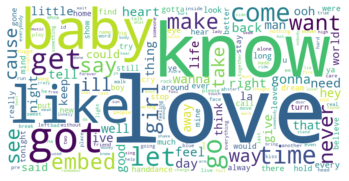

In [68]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('figures/wordcloud/total_wc.png')
plt.show()


In [35]:
grouped_decades = words_df.groupby('decade')

In [36]:
word_50s = grouped_decades.get_group('50s')
word_50s = " ".join(w.split()[0] for w in word_50s.words)

word_60s = grouped_decades.get_group('60s')
word_60s = " ".join(w.split()[0] for w in word_60s.words)

word_70s = grouped_decades.get_group('70s')
word_70s = " ".join(w.split()[0] for w in word_70s.words)

word_80s = grouped_decades.get_group('80s')
word_80s = " ".join(w.split()[0] for w in word_80s.words)

word_90s = grouped_decades.get_group('90s')
word_90s = " ".join(w.split()[0] for w in word_90s.words)

word_00s = grouped_decades.get_group('00s')
word_00s = " ".join(w.split()[0] for w in word_00s.words)

word_10s = grouped_decades.get_group('10s')
word_10s = " ".join(w.split()[0] for w in word_10s.words)

word_20s = grouped_decades.get_group('20s')
word_20s = " ".join(w.split()[0] for w in word_20s.words)

In [38]:
word_20s

'marilyn maxwell dean martin really cant stay baby cold outside ive got go away baby cold outside evening hoping drop nice ill hold hand theyre like ice mother start worry beautiful whats hurry father pacing floor listen fireplace roar really id better scurry beautiful please hurry maybe half drink put record pour neighbor might think baby bad say whats drink cab wish knew eye like starlight break spell ill take hat hair look swell ought say sir mind move closer least im gonna say tried whats sense hurtin pride marilyn maxwell dean martin really cant stay oh baby hold baby cold outside marilyn maxwell dean martin simply must go baby cold outside answer baby cold outside welcome lucky dropped nice warm look window storm sister suspicious gosh lip look delicious brother door wave upon tropical shore maiden aunt mind vicious gosh lip delicious maybe cigarette never blizzard ive gotta get home baby freeze say lend coat knee really grand thrill touch hand see thing there bound talk tomorrow

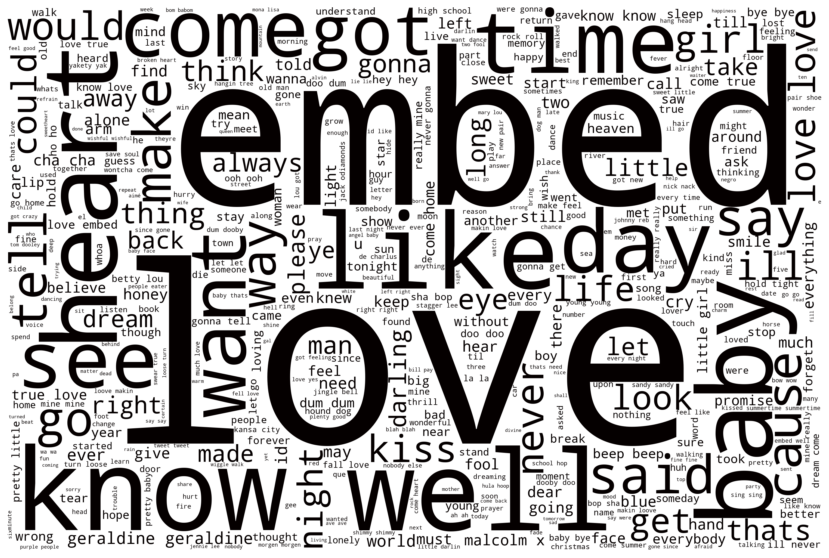

In [45]:
#50s
# set width and height to higher quality, 3000 x 2000
wordcloud_50s = WordCloud(background_color="white", width=3000, height=2000, stopwords = sw, max_words=500).generate(word_50s)
# set the word color to black
wordcloud_50s.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud_50s, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('figures/wordcloud/50s_wc.png')

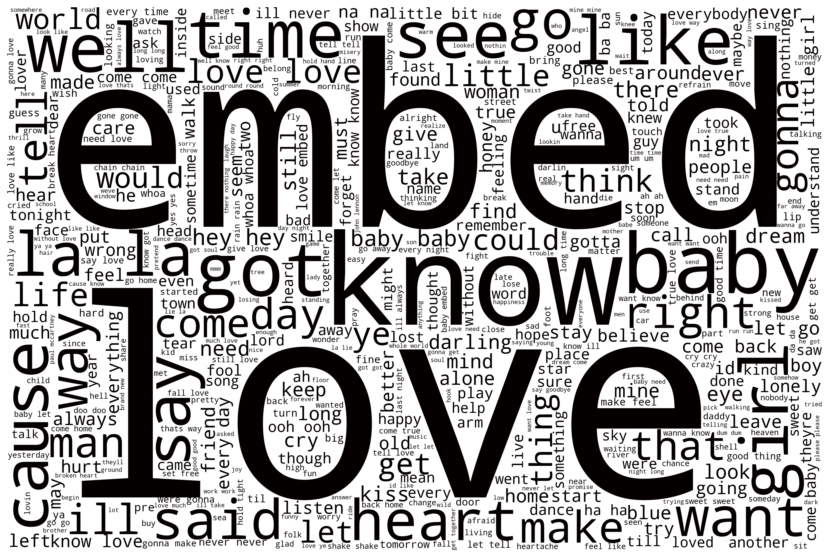

In [46]:
#60s
# set width and height to higher quality, 3000 x 2000
wordcloud_60s = WordCloud(background_color="white", width=3000, height=2000, stopwords = sw, max_words=500).generate(word_60s)
# set the word color to black
wordcloud_60s.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud_60s, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('figures/wordcloud/60s_wc.png')

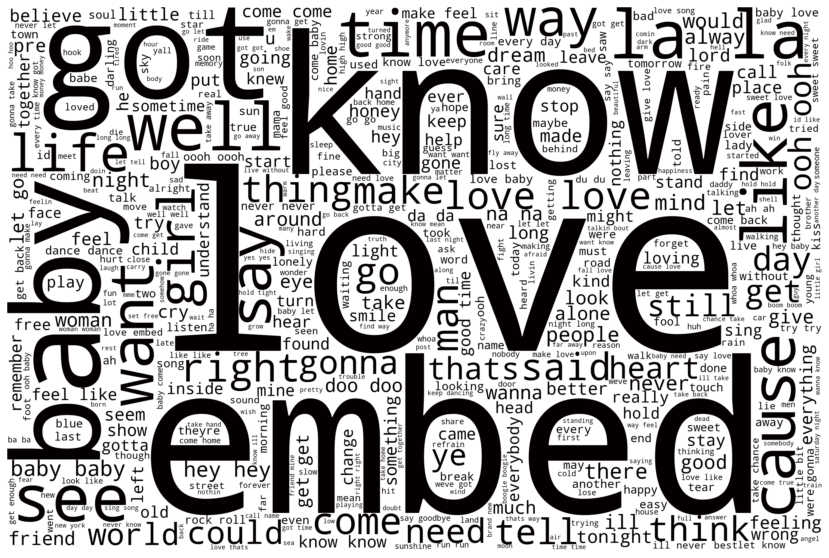

In [47]:
#70s
# set width and height to higher quality, 3000 x 2000
wordcloud_70s = WordCloud(background_color="white", width=3000, height=2000, stopwords = sw, max_words=500).generate(word_70s)
# set the word color to black
wordcloud_70s.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud_70s, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('figures/wordcloud/70s_wc.png')

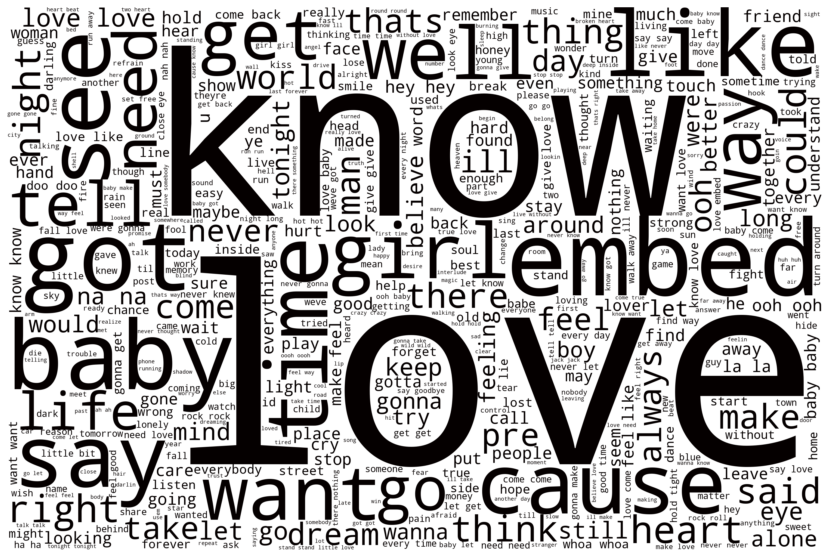

In [49]:
#80s
# set width and height to higher quality, 3000 x 2000
wordcloud_80s = WordCloud(background_color="white", width=3000, height=2000, stopwords = sw, max_words=500).generate(word_80s)
# set the word color to black
wordcloud_80s.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud_80s, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('figures/wordcloud/80s_wc.png')

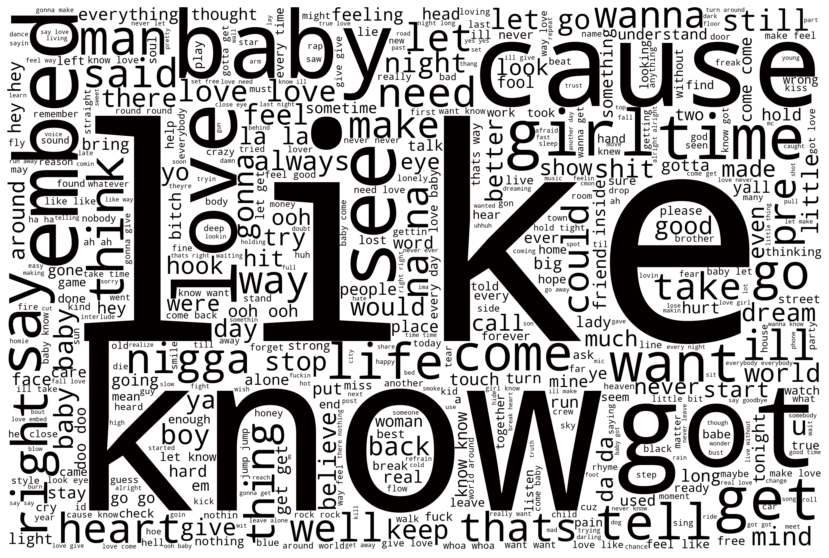

In [50]:
#90s
# set width and height to higher quality, 3000 x 2000
wordcloud_90s = WordCloud(background_color="white", width=3000, height=2000, stopwords = sw, max_words=500).generate(word_90s)
# set the word color to black
wordcloud_90s.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud_90s, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('figures/wordcloud/90s_wc.png')

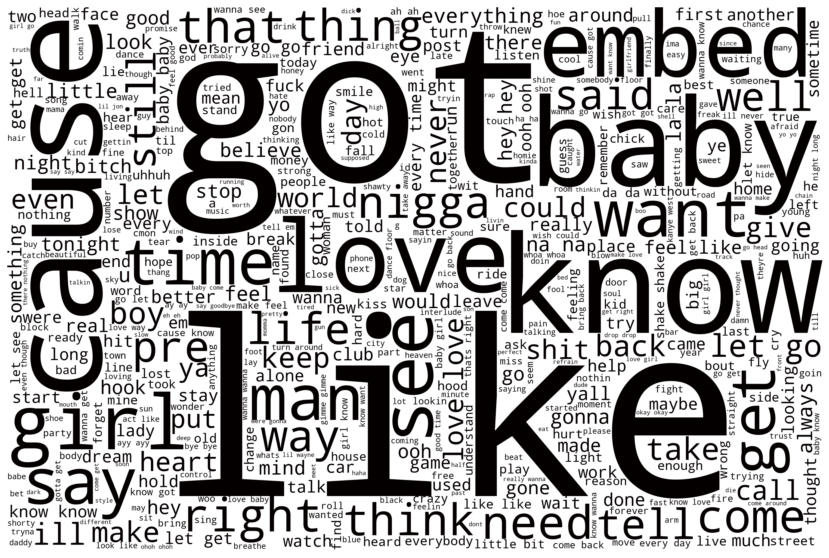

In [51]:
#00s
# set width and height to higher quality, 3000 x 2000
wordcloud_00s = WordCloud(background_color="white", width=3000, height=2000, stopwords = sw, max_words=500).generate(word_00s)
# set the word color to black
wordcloud_00s.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud_00s, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('figures/wordcloud/00s_wc.png')

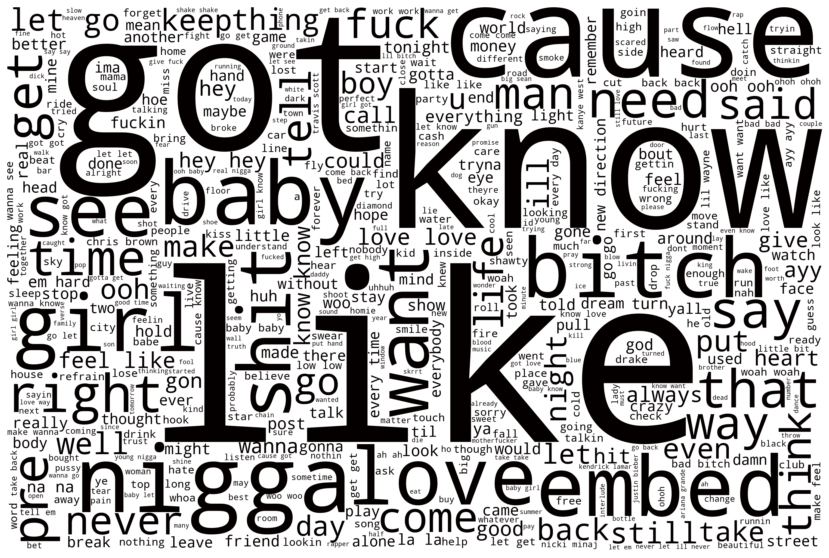

In [52]:
#10s
# set width and height to higher quality, 3000 x 2000
wordcloud_10s = WordCloud(background_color="white", width=3000, height=2000, stopwords = sw, max_words=500).generate(word_10s)
# set the word color to black
wordcloud_10s.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud_10s, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('figures/wordcloud/10s_wc.png')

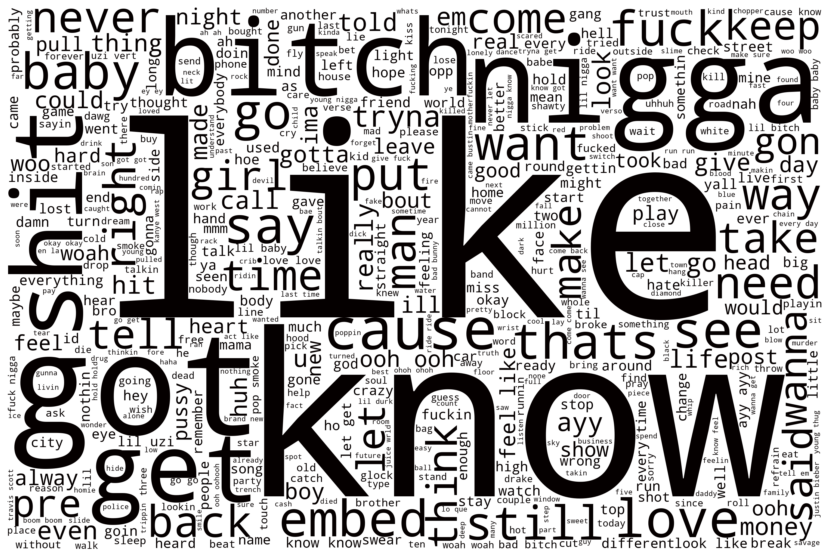

In [53]:
#20s
# set width and height to higher quality, 3000 x 2000
wordcloud_20s = WordCloud(background_color="white", width=3000, height=2000, stopwords = sw, max_words=500).generate(word_20s)
# set the word color to black
wordcloud_20s.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud_20s, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('figures/wordcloud/20s_wc.png')

In [43]:
word_cloud_50s = WordCloud(collocations = False, 
                       width = 800, height = 400, 
                       stopwords = sw, background_color = 'white').generate(word_50s)

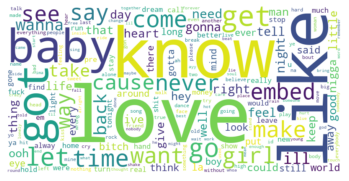

In [44]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
words_df['words'].values.astype('U')

array(['used', 'play', 'around', ..., 'te', 'bellaqueo', 'embed'],
      dtype='<U94')

In [9]:
#Defined  your own Stopwords in case the clean data function does not remove all of them
stop_words = ['verse','im','get','1000','58','60','80','youre','youve',
               'guitar','solo','instrumental','intro','pre',"3","yo","yeah","huh","uh"]

# count the frequency of each word that don't have on the stop_words lists          
cv = CountVectorizer(stop_words=stop_words)

In [ ]:
list(words_df['words'])

In [13]:
text_cv = cv.fit_transform(list(spotify_lyrics['words']))

In [14]:
text_cv

<29931x65434 sparse matrix of type '<class 'numpy.int64'>'
	with 1811338 stored elements in Compressed Sparse Row format>

In [16]:
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names_out())
data_cv['decade'] = spotify_lyrics['decade']


MemoryError: Unable to allocate 14.6 GiB for an array with shape (29931, 65434) and data type int64

In [8]:

#text_cv = cv.fit_transform(words_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['decade'] = words_df['decade']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by decade
vect_words = data_cv.groupby('decade').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv('words.csv',index=False)

#change the order of columns to order from the oldest to actual decade
vect_words = vect_words[['words','80s','90s','00s','10s']]

ValueError: np.nan is an invalid document, expected byte or unicode string.

## Lyric Sentiment analysis - pos/neg/neu (VADER)

In [ ]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Everybody loves the things you do From the way you talk To the way you move Everybody here is watching you Cause you feel like home You're like a dream come true")

In [ ]:
spotify_lyrics['words'][0]

In [ ]:
spotify_lyrics = spotify_lyrics.reset_index()  # make sure indexes pair with number of rows
joined = []
for index, row in spotify_lyrics.iterrows():
    joined.append(' '.join(row['words']))



In [ ]:
spotify_lyrics["joined_clean_words"] = joined

In [ ]:
spotify_lyrics

In [ ]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(spotify_lyrics['joined_clean_words'][0])

In [ ]:
sentiment = []
for index, row in spotify_lyrics.iterrows():
    pol_score = sia.polarity_scores(row["joined_clean_words"])
    sentiment.append(pol_score)

sentiment

In [ ]:
spotify_lyrics["sentiment"] = sentiment
compound_list = []
neg_list = []
pos_list = []
neu_list = []

for idx, x in enumerate(sentiment):
    compound_list.append(x['compound'])
    neg_list.append(x['neg'])
    pos_list.append(x['pos'])
    neu_list.append(x['neu'])

spotify_lyrics["compound"] = compound_list
spotify_lyrics["neg"] = neg_list
spotify_lyrics["pos"] = pos_list
spotify_lyrics["neu"] = neu_list

In [ ]:
spotify_lyrics

In [ ]:
spotify_lyrics.to_csv("lyrics_sentiment.csv")

## TextBlob Analysis

In [ ]:
TextBlob("love love hate").sentiment.subjectivity

In [ ]:
subjectivity = []
polarity = []
for index, row in spotify_lyrics.iterrows():
    subj_score = TextBlob(row["joined_clean_words"]).sentiment.subjectivity
    pol_score = TextBlob(row["joined_clean_words"]).sentiment.polarity
    subjectivity.append(subj_score)
    polarity.append(pol_score)

polarity

In [ ]:
spotify_lyrics["subjectivity"] = subjectivity
spotify_lyrics["polarity"] = polarity

In [ ]:
spotify_lyrics

In [ ]:
spotify_lyrics.to_csv("lyrics_sentiment.csv")

## NRC Lex

In [67]:
from nrclex import NRCLex

In [68]:
spotify_lyrics = pd.read_csv("lyrics_sentiment.csv")

In [69]:
spotify_lyrics

level_0  index        date  rank                            title  \
0            0      0  1958-08-11     1                 Poor Little Fool   
1            1      1  1958-08-11     2  Nel Blu Dipinto Di Blu (Volare)   
2            2      2  1958-08-11     3                         Patricia   
3            3      3  1958-08-11     4                    Splish Splash   
4            4      4  1958-08-11     5                             When   
...        ...    ...         ...   ...                              ...   
29926    29926  29926  2022-04-09    59                      Make Up Sex   
29927    29927  29927  2022-04-09    73                     X Ultima Vez   
29928    29928  29928  2022-04-09    74                         Envolver   
29929    29929  29929  2022-04-09    80                          Chaotic   
29930    29930  29930  2022-04-09    89                            Sigue   

                              artist  year        song_id  \
0                       Ricky Nelson  1958   1958-08-11_1   
1                   Domenico Modugno  1958   1958-08-11_2   
2      Perez Prado And His Orchestra  1958   1958-08-11_3   
3                        Bobby Darin  1958   1958-08-11_4   
4                        Kalin Twins  1958   1958-08-11_5   
...                              ...   ...            ...   
29926  Machine Gun Kelly X blackbear  2022  2022-04-09_59   
29927       Daddy Yankee & Bad Bunny  2022  2022-04-09_73   
29928                         Anitta  2022  2022-04-09_74   
29929                     Tate McRae  2022  2022-04-09_80   
29930          J Balvin & Ed Sheeran  2022  2022-04-09_89   

                                           title_artist  \
0                         Poor Little Fool_Ricky Nelson   
1      Nel Blu Dipinto Di Blu (Volare)_Domenico Modugno   
2                Patricia_Perez Prado And His Orchestra   
3                             Splish Splash_Bobby Darin   
4                                      When_Kalin Twins   
...                                                 ...   
29926         Make Up Sex_Machine Gun Kelly X blackbear   
29927             X Ultima Vez_Daddy Yankee & Bad Bunny   
29928                                   Envolver_Anitta   
29929                                Chaotic_Tate McRae   
29930                       Sigue_J Balvin & Ed Sheeran   

                                                  lyrics  ...  \
0      poor little fool lyrics i used to play around ...  ...   
1      nel blu dipinto di blu lyrics  testo di nel bl...  ...   
2      patricia lyrics kiss her and your lips will al...  ...   
3      splish splash lyrics   splish splash i was tak...  ...   
4      when lyrics when when you smile when you smile...  ...   
...                                                  ...  ...   
29926  make up sex lyrics   machine gun kelly okay sc...  ...   
29927  x última vez lyrics  letra de x última vez   d...  ...   
29928  envolver lyrics  letra de envolver   dime cómo...  ...   
29929  chaotic lyrics   i have this paralyzing fear t...  ...   
29930  sigue lyrics  letra de sigue   j balvin dale  ...  ...   

                                      joined_clean_words  \
0      used play around heart hastened call met littl...   
1      testo di nel blu dipinto di blu strofa penso c...   
2      kiss lip always want patricia stroll see patri...   
3      splish splash taking bath long saturday night ...   
4      smile smile well well know love always kiss ki...   
...                                                  ...   
29926  machine gun kelly okay screaming fuck screamin...   
29927  letra de x última vez daddy yankee bad bunny d...   
29928  letra de envolver dime cómo hacemos si tú dese...   
29929  paralyzing fear ill maybe go nowhere god forbi...   
29930  letra de sigue j balvin dale coro ed sheeran j...   

                                               sentiment compound    neg  \
0      {'neg': 0.451, 'neu': 0.373, 'pos': 0.175, 'co...  -0.9970  0.451  

In [ ]:
fear_fr = []
anger_fr = []
trust_fr = []
surprise_fr = []
sadness_fr = []
disgust_fr = []
joy_fr = []
anticipation_fr = []
positive_fr = []
negative_fr = []

NRC_lex = []
NRC_raw = []

for index, row in spotify_lyrics.iterrows():
    emotion = NRCLex(str(row["joined_clean_words"]))
    LexDic = emotion.affect_frequencies
    LexRaw = emotion.raw_emotion_scores
    NRC_lex.append(LexDic)
    NRC_raw.append(LexRaw)

NRC_raw


In [71]:
spotify_lyrics["NRC_Lex_Dictionary"] = NRC_lex
spotify_lyrics["NRC_Raw_Emotion_Scores"] = NRC_raw
spotify_lyrics

level_0  index        date  rank                            title  \
0            0      0  1958-08-11     1                 Poor Little Fool   
1            1      1  1958-08-11     2  Nel Blu Dipinto Di Blu (Volare)   
2            2      2  1958-08-11     3                         Patricia   
3            3      3  1958-08-11     4                    Splish Splash   
4            4      4  1958-08-11     5                             When   
...        ...    ...         ...   ...                              ...   
29926    29926  29926  2022-04-09    59                      Make Up Sex   
29927    29927  29927  2022-04-09    73                     X Ultima Vez   
29928    29928  29928  2022-04-09    74                         Envolver   
29929    29929  29929  2022-04-09    80                          Chaotic   
29930    29930  29930  2022-04-09    89                            Sigue   

                              artist  year        song_id  \
0                       Ricky Nelson  1958   1958-08-11_1   
1                   Domenico Modugno  1958   1958-08-11_2   
2      Perez Prado And His Orchestra  1958   1958-08-11_3   
3                        Bobby Darin  1958   1958-08-11_4   
4                        Kalin Twins  1958   1958-08-11_5   
...                              ...   ...            ...   
29926  Machine Gun Kelly X blackbear  2022  2022-04-09_59   
29927       Daddy Yankee & Bad Bunny  2022  2022-04-09_73   
29928                         Anitta  2022  2022-04-09_74   
29929                     Tate McRae  2022  2022-04-09_80   
29930          J Balvin & Ed Sheeran  2022  2022-04-09_89   

                                           title_artist  \
0                         Poor Little Fool_Ricky Nelson   
1      Nel Blu Dipinto Di Blu (Volare)_Domenico Modugno   
2                Patricia_Perez Prado And His Orchestra   
3                             Splish Splash_Bobby Darin   
4                                      When_Kalin Twins   
...                                                 ...   
29926         Make Up Sex_Machine Gun Kelly X blackbear   
29927             X Ultima Vez_Daddy Yankee & Bad Bunny   
29928                                   Envolver_Anitta   
29929                                Chaotic_Tate McRae   
29930                       Sigue_J Balvin & Ed Sheeran   

                                                  lyrics  ...  \
0      poor little fool lyrics i used to play around ...  ...   
1      nel blu dipinto di blu lyrics  testo di nel bl...  ...   
2      patricia lyrics kiss her and your lips will al...  ...   
3      splish splash lyrics   splish splash i was tak...  ...   
4      when lyrics when when you smile when you smile...  ...   
...                                                  ...  ...   
29926  make up sex lyrics   machine gun kelly okay sc...  ...   
29927  x última vez lyrics  letra de x última vez   d...  ...   
29928  envolver lyrics  letra de envolver   dime cómo...  ...   
29929  chaotic lyrics   i have this paralyzing fear t...  ...   
29930  sigue lyrics  letra de sigue   j balvin dale  ...  ...   

                                      joined_clean_words  \
0      used play around heart hastened call met littl...   
1      testo di nel blu dipinto di blu strofa penso c...   
2      kiss lip always want patricia stroll see patri...   
3      splish splash taking bath long saturday night ...   
4      smile smile well well know love always kiss ki...   
...                                                  ...   
29926  machine gun kelly okay screaming fuck screamin...   
29927  letra de x última vez daddy yankee bad bunny d...   
29928  letra de envolver dime cómo hacemos si tú dese...   
29929  paralyzing fear ill maybe go nowhere god forbi...   
29930  letra de sigue j balvin dale coro ed sheeran j...   

                                               sentiment compound    neg  \
0      {'neg': 0.451, 'neu': 0.373, 'pos': 0.175, 'co...  -0.9970  0.451  

In [51]:
spotify_lyrics.to_csv('lyrics_sentiment.csv',index=False)

In [52]:
spotify_lyrics = pd.read_csv("lyrics_sentiment.csv")

In [72]:
spotify_lyrics.dtypes

level_0                     int64
index                       int64
date                       object
rank                        int64
title                      object
artist                     object
year                        int64
song_id                    object
title_artist               object
lyrics                     object
simple_artist              object
simple_song                object
lyric_title                object
decade                     object
words                      object
joined_clean_words         object
sentiment                  object
compound                  float64
neg                       float64
pos                       float64
neu                       float64
subjectivity              float64
polarity                  float64
NRC_Lex_Dictionary         object
NRC_Raw_Emotion_Scores     object
dtype: object

In [73]:
spotify_lyrics

level_0  index        date  rank                            title  \
0            0      0  1958-08-11     1                 Poor Little Fool   
1            1      1  1958-08-11     2  Nel Blu Dipinto Di Blu (Volare)   
2            2      2  1958-08-11     3                         Patricia   
3            3      3  1958-08-11     4                    Splish Splash   
4            4      4  1958-08-11     5                             When   
...        ...    ...         ...   ...                              ...   
29926    29926  29926  2022-04-09    59                      Make Up Sex   
29927    29927  29927  2022-04-09    73                     X Ultima Vez   
29928    29928  29928  2022-04-09    74                         Envolver   
29929    29929  29929  2022-04-09    80                          Chaotic   
29930    29930  29930  2022-04-09    89                            Sigue   

                              artist  year        song_id  \
0                       Ricky Nelson  1958   1958-08-11_1   
1                   Domenico Modugno  1958   1958-08-11_2   
2      Perez Prado And His Orchestra  1958   1958-08-11_3   
3                        Bobby Darin  1958   1958-08-11_4   
4                        Kalin Twins  1958   1958-08-11_5   
...                              ...   ...            ...   
29926  Machine Gun Kelly X blackbear  2022  2022-04-09_59   
29927       Daddy Yankee & Bad Bunny  2022  2022-04-09_73   
29928                         Anitta  2022  2022-04-09_74   
29929                     Tate McRae  2022  2022-04-09_80   
29930          J Balvin & Ed Sheeran  2022  2022-04-09_89   

                                           title_artist  \
0                         Poor Little Fool_Ricky Nelson   
1      Nel Blu Dipinto Di Blu (Volare)_Domenico Modugno   
2                Patricia_Perez Prado And His Orchestra   
3                             Splish Splash_Bobby Darin   
4                                      When_Kalin Twins   
...                                                 ...   
29926         Make Up Sex_Machine Gun Kelly X blackbear   
29927             X Ultima Vez_Daddy Yankee & Bad Bunny   
29928                                   Envolver_Anitta   
29929                                Chaotic_Tate McRae   
29930                       Sigue_J Balvin & Ed Sheeran   

                                                  lyrics  ...  \
0      poor little fool lyrics i used to play around ...  ...   
1      nel blu dipinto di blu lyrics  testo di nel bl...  ...   
2      patricia lyrics kiss her and your lips will al...  ...   
3      splish splash lyrics   splish splash i was tak...  ...   
4      when lyrics when when you smile when you smile...  ...   
...                                                  ...  ...   
29926  make up sex lyrics   machine gun kelly okay sc...  ...   
29927  x última vez lyrics  letra de x última vez   d...  ...   
29928  envolver lyrics  letra de envolver   dime cómo...  ...   
29929  chaotic lyrics   i have this paralyzing fear t...  ...   
29930  sigue lyrics  letra de sigue   j balvin dale  ...  ...   

                                      joined_clean_words  \
0      used play around heart hastened call met littl...   
1      testo di nel blu dipinto di blu strofa penso c...   
2      kiss lip always want patricia stroll see patri...   
3      splish splash taking bath long saturday night ...   
4      smile smile well well know love always kiss ki...   
...                                                  ...   
29926  machine gun kelly okay screaming fuck screamin...   
29927  letra de x última vez daddy yankee bad bunny d...   
29928  letra de envolver dime cómo hacemos si tú dese...   
29929  paralyzing fear ill maybe go nowhere god forbi...   
29930  letra de sigue j balvin dale coro ed sheeran j...   

                                               sentiment compound    neg  \
0      {'neg': 0.451, 'neu': 0.373, 'pos': 0.175, 'co...  -0.9970  0.451  

In [74]:
spotify_lyrics["NRC_Lex_Dictionary"][0]["fear"]

0.025

In [75]:
df = pd.DataFrame(spotify_lyrics['NRC_Lex_Dictionary'].values.tolist(), index=spotify_lyrics.index)
print (df)

           fear     anger  anticip     trust  surprise  positive  negative  \
0      0.025000  0.037500      0.0  0.012500  0.012500  0.050000  0.387500   
1      0.000000  0.000000      0.0  0.000000  0.000000  0.000000  0.000000   
2      0.031250  0.031250      0.0  0.062500  0.093750  0.281250  0.093750   
3      0.095238  0.095238      0.0  0.063492  0.158730  0.111111  0.126984   
4      0.000000  0.000000      0.0  0.130435  0.188406  0.275362  0.000000   
...         ...       ...      ...       ...       ...       ...       ...   
29926  0.180180  0.162162      0.0  0.045045  0.045045  0.072072  0.234234   
29927  0.166667  0.151515      0.0  0.000000  0.000000  0.106061  0.166667   
29928  0.000000  0.000000      0.0  0.000000  0.000000  0.000000  0.000000   
29929  0.121495  0.168224      0.0  0.074766  0.000000  0.084112  0.205607   
29930  0.000000  0.083333      0.0  0.250000  0.000000  0.333333  0.083333   

        sadness   disgust       joy  anticipation  
0      0.05

In [76]:
spotify_lyrics = spotify_lyrics.join(df)

In [78]:
spotify_lyrics = spotify_lyrics.drop(columns=['level_0', 'anticip'])

In [79]:
spotify_lyrics.dtypes

index                       int64
date                       object
rank                        int64
title                      object
artist                     object
year                        int64
song_id                    object
title_artist               object
lyrics                     object
simple_artist              object
simple_song                object
lyric_title                object
decade                     object
words                      object
joined_clean_words         object
sentiment                  object
compound                  float64
neg                       float64
pos                       float64
neu                       float64
subjectivity              float64
polarity                  float64
NRC_Lex_Dictionary         object
NRC_Raw_Emotion_Scores     object
fear                      float64
anger                     float64
trust                     float64
surprise                  float64
positive                  float64
negative      

In [2]:
spotify_lyrics = pd.read_csv("lyrics_sentiment.csv")

In [3]:
spotify_lyrics

index        date  rank                            title  \
0          0  1958-08-11     1                 Poor Little Fool   
1          1  1958-08-11     2  Nel Blu Dipinto Di Blu (Volare)   
2          2  1958-08-11     3                         Patricia   
3          3  1958-08-11     4                    Splish Splash   
4          4  1958-08-11     5                             When   
...      ...         ...   ...                              ...   
29926  29926  2022-04-09    59                      Make Up Sex   
29927  29927  2022-04-09    73                     X Ultima Vez   
29928  29928  2022-04-09    74                         Envolver   
29929  29929  2022-04-09    80                          Chaotic   
29930  29930  2022-04-09    89                            Sigue   

                              artist  year        song_id  \
0                       Ricky Nelson  1958   1958-08-11_1   
1                   Domenico Modugno  1958   1958-08-11_2   
2      Perez Prado And His Orchestra  1958   1958-08-11_3   
3                        Bobby Darin  1958   1958-08-11_4   
4                        Kalin Twins  1958   1958-08-11_5   
...                              ...   ...            ...   
29926  Machine Gun Kelly X blackbear  2022  2022-04-09_59   
29927       Daddy Yankee & Bad Bunny  2022  2022-04-09_73   
29928                         Anitta  2022  2022-04-09_74   
29929                     Tate McRae  2022  2022-04-09_80   
29930          J Balvin & Ed Sheeran  2022  2022-04-09_89   

                                           title_artist  \
0                         Poor Little Fool_Ricky Nelson   
1      Nel Blu Dipinto Di Blu (Volare)_Domenico Modugno   
2                Patricia_Perez Prado And His Orchestra   
3                             Splish Splash_Bobby Darin   
4                                      When_Kalin Twins   
...                                                 ...   
29926         Make Up Sex_Machine Gun Kelly X blackbear   
29927             X Ultima Vez_Daddy Yankee & Bad Bunny   
29928                                   Envolver_Anitta   
29929                                Chaotic_Tate McRae   
29930                       Sigue_J Balvin & Ed Sheeran   

                                                  lyrics      simple_artist  \
0      poor little fool lyrics i used to play around ...       ricky nelson   
1      nel blu dipinto di blu lyrics  testo di nel bl...   domenico modugno   
2      patricia lyrics kiss her and your lips will al...        perez prado   
3      splish splash lyrics   splish splash i was tak...        bobby darin   
4      when lyrics when when you smile when you smile...        kalin twins   
...                                                  ...                ...   
29926  make up sex lyrics   machine gun kelly okay sc...  machine gun kelly   
29927  x última vez lyrics  letra de x última vez   d...       daddy yankee   
29928  envolver lyrics  letra de envolver   dime cómo...             anitta   
29929  chaotic lyrics   i have this paralyzing fear t...         tate mcrae   
29930  sigue lyrics  letra de sigue   j balvin dale  ...           j balvin   

       ...   fear_fr  anger_fr  trust_fr surprise_fr positive_fr negative_fr  \
0      ...  0.025000  0.037500  0.012500    0.012500    0.050000    0.387500   
1      ...  0.000000  0.000000  0.000000    0.000000    0.000000    0.000000   
2      ...  0.031250  0.031250  0.062500    0.093750    0.281250    0.093750   
3      ...  0.095238  0.095238  0.063492    0.158730    0.111111    0.126984   
4      ...  0.000000  0.000000  0.130435    0.188406    0.275362    0.000000   
...    ...       ...       ...       ...         ...         ...         ...   
29926  ...  0.180180  0.162162  0.045045    0.045045    0.072072    0.234234   
29927  ...  0.166667  0.151515  0.000000    0.000000    0.106061    0.166667   
29928  ...  0.000000  0.000000  0.000000    0.000000    0.000000    0.000000   
29929  ... 

In [4]:
spotify_lyrics["NRC_Raw_Emotion_Scores"]

0        {'negative': 31, 'sadness': 4, 'disgust': 26, ...
1                                                       {}
2        {'anticipation': 6, 'joy': 6, 'positive': 9, '...
3        {'surprise': 10, 'positive': 7, 'anticipation'...
4        {'joy': 19, 'positive': 19, 'surprise': 13, 't...
                               ...                        
29926    {'trust': 5, 'anger': 18, 'fear': 20, 'negativ...
29927    {'anger': 10, 'disgust': 10, 'fear': 11, 'nega...
29928                                                   {}
29929    {'anger': 18, 'fear': 13, 'negative': 22, 'dis...
29930    {'anticipation': 1, 'positive': 4, 'trust': 3,...
Name: NRC_Raw_Emotion_Scores, Length: 29931, dtype: object

In [8]:
ast.literal_eval(spotify_lyrics["NRC_Raw_Emotion_Scores"][0])


{'negative': 31,
 'sadness': 4,
 'disgust': 26,
 'anger': 3,
 'anticipation': 5,
 'fear': 2,
 'joy': 3,
 'positive': 4,
 'surprise': 1,
 'trust': 1}

In [11]:
def raw_emotion_score(emotion):
    raw_score = []
    for idx, x in enumerate(spotify_lyrics["NRC_Raw_Emotion_Scores"]):
        if emotion in ast.literal_eval(x).keys():
            raw_score.append(ast.literal_eval(x)[emotion])
        else:
            raw_score.append(0)
    return raw_score


In [15]:
spotify_lyrics["anger_raw"] = raw_emotion_score("anger")
spotify_lyrics["negative_raw"] = raw_emotion_score("negative")
spotify_lyrics["sadness_raw"] = raw_emotion_score("sadness")
spotify_lyrics["disgust_raw"] = raw_emotion_score("disgust")
spotify_lyrics["anticipation_raw"] = raw_emotion_score("anticipation")
spotify_lyrics["fear_raw"] = raw_emotion_score("fear")
spotify_lyrics["joy_raw"] = raw_emotion_score("joy")
spotify_lyrics["postive_raw"] = raw_emotion_score("positive")
spotify_lyrics["surprise_raw"] = raw_emotion_score("surprise")
spotify_lyrics["trust_raw"] = raw_emotion_score("trust")

In [16]:
spotify_lyrics

index        date  rank                            title  \
0          0  1958-08-11     1                 Poor Little Fool   
1          1  1958-08-11     2  Nel Blu Dipinto Di Blu (Volare)   
2          2  1958-08-11     3                         Patricia   
3          3  1958-08-11     4                    Splish Splash   
4          4  1958-08-11     5                             When   
...      ...         ...   ...                              ...   
29926  29926  2022-04-09    59                      Make Up Sex   
29927  29927  2022-04-09    73                     X Ultima Vez   
29928  29928  2022-04-09    74                         Envolver   
29929  29929  2022-04-09    80                          Chaotic   
29930  29930  2022-04-09    89                            Sigue   

                              artist  year        song_id  \
0                       Ricky Nelson  1958   1958-08-11_1   
1                   Domenico Modugno  1958   1958-08-11_2   
2      Perez Prado And His Orchestra  1958   1958-08-11_3   
3                        Bobby Darin  1958   1958-08-11_4   
4                        Kalin Twins  1958   1958-08-11_5   
...                              ...   ...            ...   
29926  Machine Gun Kelly X blackbear  2022  2022-04-09_59   
29927       Daddy Yankee & Bad Bunny  2022  2022-04-09_73   
29928                         Anitta  2022  2022-04-09_74   
29929                     Tate McRae  2022  2022-04-09_80   
29930          J Balvin & Ed Sheeran  2022  2022-04-09_89   

                                           title_artist  \
0                         Poor Little Fool_Ricky Nelson   
1      Nel Blu Dipinto Di Blu (Volare)_Domenico Modugno   
2                Patricia_Perez Prado And His Orchestra   
3                             Splish Splash_Bobby Darin   
4                                      When_Kalin Twins   
...                                                 ...   
29926         Make Up Sex_Machine Gun Kelly X blackbear   
29927             X Ultima Vez_Daddy Yankee & Bad Bunny   
29928                                   Envolver_Anitta   
29929                                Chaotic_Tate McRae   
29930                       Sigue_J Balvin & Ed Sheeran   

                                                  lyrics      simple_artist  \
0      poor little fool lyrics i used to play around ...       ricky nelson   
1      nel blu dipinto di blu lyrics  testo di nel bl...   domenico modugno   
2      patricia lyrics kiss her and your lips will al...        perez prado   
3      splish splash lyrics   splish splash i was tak...        bobby darin   
4      when lyrics when when you smile when you smile...        kalin twins   
...                                                  ...                ...   
29926  make up sex lyrics   machine gun kelly okay sc...  machine gun kelly   
29927  x última vez lyrics  letra de x última vez   d...       daddy yankee   
29928  envolver lyrics  letra de envolver   dime cómo...             anitta   
29929  chaotic lyrics   i have this paralyzing fear t...         tate mcrae   
29930  sigue lyrics  letra de sigue   j balvin dale  ...           j balvin   

       ... anger_raw negative_raw sadness_raw disgust_raw anticipation_raw  \
0      ...         3           31           4          26                5   
1      ...         0            0           0           0                0   
2      ...         1            3           1           0                6   
3      ...         6            8           6           6                6   
4      ...         0            0           0           0                9   
...    ...       ...          ...         ...         ...              ...   
29926  ...        18           26          11          10                2   
29927  ...        10           11          11          10                0   
29928  ...         0            0           0           0                0   
29929  ...        18           

In [17]:
spotify_lyrics.to_csv("lyrics_sentiment.csv")

In [29]:
spotify_lyrics.iloc[:, -10:].values

array([[ 3, 31,  4, ...,  4,  1,  1],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  3,  1, ...,  9,  3,  2],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [18, 22, 13, ...,  9,  0,  8],
       [ 1,  1,  0, ...,  4,  0,  3]], dtype=int64)

In [ ]:
spotify_lyrics.columns.values[x]

In [49]:
df = spotify_lyrics.iloc[:, -10:]
arr = np.argsort(-df.values, axis = 1)
df1 = pd.DataFrame(df.columns[arr])
print(df1.values)

array = df1.to_numpy()
spotify_lyrics.join(df1)




[['negative_raw' 'disgust_raw' 'anticipation_raw' ... 'fear_raw'
  'surprise_raw' 'trust_raw']
 ['anger_raw' 'negative_raw' 'sadness_raw' ... 'postive_raw'
  'surprise_raw' 'trust_raw']
 ['postive_raw' 'anticipation_raw' 'joy_raw' ... 'sadness_raw' 'fear_raw'
  'disgust_raw']
 ...
 ['anger_raw' 'negative_raw' 'sadness_raw' ... 'postive_raw'
  'surprise_raw' 'trust_raw']
 ['negative_raw' 'anger_raw' 'disgust_raw' ... 'joy_raw'
  'anticipation_raw' 'surprise_raw']
 ['postive_raw' 'trust_raw' 'joy_raw' ... 'disgust_raw' 'fear_raw'
  'surprise_raw']]


C:\Users\Lisa\AppData\Local\Temp\ipykernel_12032\1882558749.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df1 = pd.DataFrame(df.columns[arr])


index        date  rank                            title  \
0          0  1958-08-11     1                 Poor Little Fool   
1          1  1958-08-11     2  Nel Blu Dipinto Di Blu (Volare)   
2          2  1958-08-11     3                         Patricia   
3          3  1958-08-11     4                    Splish Splash   
4          4  1958-08-11     5                             When   
...      ...         ...   ...                              ...   
29926  29926  2022-04-09    59                      Make Up Sex   
29927  29927  2022-04-09    73                     X Ultima Vez   
29928  29928  2022-04-09    74                         Envolver   
29929  29929  2022-04-09    80                          Chaotic   
29930  29930  2022-04-09    89                            Sigue   

                              artist  year        song_id  \
0                       Ricky Nelson  1958   1958-08-11_1   
1                   Domenico Modugno  1958   1958-08-11_2   
2      Perez Prado And His Orchestra  1958   1958-08-11_3   
3                        Bobby Darin  1958   1958-08-11_4   
4                        Kalin Twins  1958   1958-08-11_5   
...                              ...   ...            ...   
29926  Machine Gun Kelly X blackbear  2022  2022-04-09_59   
29927       Daddy Yankee & Bad Bunny  2022  2022-04-09_73   
29928                         Anitta  2022  2022-04-09_74   
29929                     Tate McRae  2022  2022-04-09_80   
29930          J Balvin & Ed Sheeran  2022  2022-04-09_89   

                                           title_artist  \
0                         Poor Little Fool_Ricky Nelson   
1      Nel Blu Dipinto Di Blu (Volare)_Domenico Modugno   
2                Patricia_Perez Prado And His Orchestra   
3                             Splish Splash_Bobby Darin   
4                                      When_Kalin Twins   
...                                                 ...   
29926         Make Up Sex_Machine Gun Kelly X blackbear   
29927             X Ultima Vez_Daddy Yankee & Bad Bunny   
29928                                   Envolver_Anitta   
29929                                Chaotic_Tate McRae   
29930                       Sigue_J Balvin & Ed Sheeran   

                                                  lyrics      simple_artist  \
0      poor little fool lyrics i used to play around ...       ricky nelson   
1      nel blu dipinto di blu lyrics  testo di nel bl...   domenico modugno   
2      patricia lyrics kiss her and your lips will al...        perez prado   
3      splish splash lyrics   splish splash i was tak...        bobby darin   
4      when lyrics when when you smile when you smile...        kalin twins   
...                                                  ...                ...   
29926  make up sex lyrics   machine gun kelly okay sc...  machine gun kelly   
29927  x última vez lyrics  letra de x última vez   d...       daddy yankee   
29928  envolver lyrics  letra de envolver   dime cómo...             anitta   
29929  chaotic lyrics   i have this paralyzing fear t...         tate mcrae   
29930  sigue lyrics  letra de sigue   j balvin dale  ...           j balvin   

       ...             0                 1                 2  \
0      ...  negative_raw       disgust_raw  anticipation_raw   
1      ...     anger_raw      negative_raw       sadness_raw   
2      ...   postive_raw  anticipation_raw           joy_raw   
3      ...  surprise_raw      negative_raw       postive_raw   
4      ...       joy_raw       postive_raw      surprise_raw   
...    ...           ...               ...               ...   
29926  ...  negative_raw          fear_raw         anger_raw   
29927  ...  negative_raw       sadness_raw          fear_raw   
29928  ...     anger_raw      negative_raw       sadness_raw   
29929  ...  negative_raw         anger_raw       disgust_raw   
29930  ...   postive_raw         trust_raw           joy_raw   

                      3                 4 

In [55]:
spotify_lyrics = spotify_lyrics.join(df1)

In [58]:
spotify_lyrics.columns

Index([                 'index',                   'date',
                         'rank',                  'title',
                       'artist',                   'year',
                      'song_id',           'title_artist',
                       'lyrics',          'simple_artist',
                  'simple_song',            'lyric_title',
                       'decade',                  'words',
           'joined_clean_words',              'sentiment',
                     'compound',                    'neg',
                          'pos',                    'neu',
                 'subjectivity',               'polarity',
           'NRC_Lex_Dictionary', 'NRC_Raw_Emotion_Scores',
                      'fear_fr',               'anger_fr',
                     'trust_fr',            'surprise_fr',
                  'positive_fr',            'negative_fr',
                   'sadness_fr',             'disgust_fr',
                       'joy_fr',        'anticipation_fr

In [61]:
spotify_lyrics.rename(
    columns = {0:'emo_rank_1', 1: 'emo_rank_2', 
              2:'emo_rank_3', 3:'emo_rank_4', 
               4: 'emo_rank_5', 5: 'emo_rank_6', 
              6: 'emo_rank_7', 7: 'emo_rank_8', 
              8: 'emo_rank_9', 9: 'emo_rank_10'}, inplace = True)

In [62]:
spotify_lyrics

index        date  rank                            title  \
0          0  1958-08-11     1                 Poor Little Fool   
1          1  1958-08-11     2  Nel Blu Dipinto Di Blu (Volare)   
2          2  1958-08-11     3                         Patricia   
3          3  1958-08-11     4                    Splish Splash   
4          4  1958-08-11     5                             When   
...      ...         ...   ...                              ...   
29926  29926  2022-04-09    59                      Make Up Sex   
29927  29927  2022-04-09    73                     X Ultima Vez   
29928  29928  2022-04-09    74                         Envolver   
29929  29929  2022-04-09    80                          Chaotic   
29930  29930  2022-04-09    89                            Sigue   

                              artist  year        song_id  \
0                       Ricky Nelson  1958   1958-08-11_1   
1                   Domenico Modugno  1958   1958-08-11_2   
2      Perez Prado And His Orchestra  1958   1958-08-11_3   
3                        Bobby Darin  1958   1958-08-11_4   
4                        Kalin Twins  1958   1958-08-11_5   
...                              ...   ...            ...   
29926  Machine Gun Kelly X blackbear  2022  2022-04-09_59   
29927       Daddy Yankee & Bad Bunny  2022  2022-04-09_73   
29928                         Anitta  2022  2022-04-09_74   
29929                     Tate McRae  2022  2022-04-09_80   
29930          J Balvin & Ed Sheeran  2022  2022-04-09_89   

                                           title_artist  \
0                         Poor Little Fool_Ricky Nelson   
1      Nel Blu Dipinto Di Blu (Volare)_Domenico Modugno   
2                Patricia_Perez Prado And His Orchestra   
3                             Splish Splash_Bobby Darin   
4                                      When_Kalin Twins   
...                                                 ...   
29926         Make Up Sex_Machine Gun Kelly X blackbear   
29927             X Ultima Vez_Daddy Yankee & Bad Bunny   
29928                                   Envolver_Anitta   
29929                                Chaotic_Tate McRae   
29930                       Sigue_J Balvin & Ed Sheeran   

                                                  lyrics      simple_artist  \
0      poor little fool lyrics i used to play around ...       ricky nelson   
1      nel blu dipinto di blu lyrics  testo di nel bl...   domenico modugno   
2      patricia lyrics kiss her and your lips will al...        perez prado   
3      splish splash lyrics   splish splash i was tak...        bobby darin   
4      when lyrics when when you smile when you smile...        kalin twins   
...                                                  ...                ...   
29926  make up sex lyrics   machine gun kelly okay sc...  machine gun kelly   
29927  x última vez lyrics  letra de x última vez   d...       daddy yankee   
29928  envolver lyrics  letra de envolver   dime cómo...             anitta   
29929  chaotic lyrics   i have this paralyzing fear t...         tate mcrae   
29930  sigue lyrics  letra de sigue   j balvin dale  ...           j balvin   

       ...    emo_rank_1        emo_rank_2        emo_rank_3  \
0      ...  negative_raw       disgust_raw  anticipation_raw   
1      ...     anger_raw      negative_raw       sadness_raw   
2      ...   postive_raw  anticipation_raw           joy_raw   
3      ...  surprise_raw      negative_raw       postive_raw   
4      ...       joy_raw       postive_raw      surprise_raw   
...    ...           ...               ...               ...   
29926  ...  negative_raw          fear_raw         anger_raw   
29927  ...  negative_raw       sadness_raw          fear_raw   
29928  ...     anger_raw      negative_raw       sadness_raw   
29929  ...  negative_raw         anger_raw       disgust_raw   
29930  ...   postive_raw         trust_raw           joy_raw   

             emo_rank_4        emo_rank_5 

In [65]:
spotify_lyrics.to_csv("lyrics_sentiment.csv")

In [86]:
spotify_lyrics.rename(
    columns = {'fear':'fear_fr', 'anger':'anger_fr', 
              'trust': 'trust_fr', 'surprise': 'surprise_fr', 
              'positive': 'positive_fr', 'negative': 'negative_fr', 
              'sadness': 'sadness_fr', 'disgust': 'disgust_fr', 
              'joy': 'joy_fr', 'anticipation': 'anticipation_fr'}, inplace = True)

In [87]:
spotify_lyrics

index        date  rank                            title  \
0          0  1958-08-11     1                 Poor Little Fool   
1          1  1958-08-11     2  Nel Blu Dipinto Di Blu (Volare)   
2          2  1958-08-11     3                         Patricia   
3          3  1958-08-11     4                    Splish Splash   
4          4  1958-08-11     5                             When   
...      ...         ...   ...                              ...   
29926  29926  2022-04-09    59                      Make Up Sex   
29927  29927  2022-04-09    73                     X Ultima Vez   
29928  29928  2022-04-09    74                         Envolver   
29929  29929  2022-04-09    80                          Chaotic   
29930  29930  2022-04-09    89                            Sigue   

                              artist  year        song_id  \
0                       Ricky Nelson  1958   1958-08-11_1   
1                   Domenico Modugno  1958   1958-08-11_2   
2      Perez Prado And His Orchestra  1958   1958-08-11_3   
3                        Bobby Darin  1958   1958-08-11_4   
4                        Kalin Twins  1958   1958-08-11_5   
...                              ...   ...            ...   
29926  Machine Gun Kelly X blackbear  2022  2022-04-09_59   
29927       Daddy Yankee & Bad Bunny  2022  2022-04-09_73   
29928                         Anitta  2022  2022-04-09_74   
29929                     Tate McRae  2022  2022-04-09_80   
29930          J Balvin & Ed Sheeran  2022  2022-04-09_89   

                                           title_artist  \
0                         Poor Little Fool_Ricky Nelson   
1      Nel Blu Dipinto Di Blu (Volare)_Domenico Modugno   
2                Patricia_Perez Prado And His Orchestra   
3                             Splish Splash_Bobby Darin   
4                                      When_Kalin Twins   
...                                                 ...   
29926         Make Up Sex_Machine Gun Kelly X blackbear   
29927             X Ultima Vez_Daddy Yankee & Bad Bunny   
29928                                   Envolver_Anitta   
29929                                Chaotic_Tate McRae   
29930                       Sigue_J Balvin & Ed Sheeran   

                                                  lyrics      simple_artist  \
0      poor little fool lyrics i used to play around ...       ricky nelson   
1      nel blu dipinto di blu lyrics  testo di nel bl...   domenico modugno   
2      patricia lyrics kiss her and your lips will al...        perez prado   
3      splish splash lyrics   splish splash i was tak...        bobby darin   
4      when lyrics when when you smile when you smile...        kalin twins   
...                                                  ...                ...   
29926  make up sex lyrics   machine gun kelly okay sc...  machine gun kelly   
29927  x última vez lyrics  letra de x última vez   d...       daddy yankee   
29928  envolver lyrics  letra de envolver   dime cómo...             anitta   
29929  chaotic lyrics   i have this paralyzing fear t...         tate mcrae   
29930  sigue lyrics  letra de sigue   j balvin dale  ...           j balvin   

       ...   fear_fr  anger_fr  trust_fr surprise_fr positive_fr negative_fr  \
0      ...  0.025000  0.037500  0.012500    0.012500    0.050000    0.387500   
1      ...  0.000000  0.000000  0.000000    0.000000    0.000000    0.000000   
2      ...  0.031250  0.031250  0.062500    0.093750    0.281250    0.093750   
3      ...  0.095238  0.095238  0.063492    0.158730    0.111111    0.126984   
4      ...  0.000000  0.000000  0.130435    0.188406    0.275362    0.000000   
...    ...       ...       ...       ...         ...         ...         ...   
29926  ...  0.180180  0.162162  0.045045    0.045045    0.072072    0.234234   
29927  ...  0.166667  0.151515  0.000000    0.000000    0.106061    0.166667   
29928  ...  0.000000  0.000000  0.000000    0.000000    0.000000    0.000000   
29929  ... 

In [88]:
spotify_lyrics.to_csv('lyrics_sentiment.csv',index=False)

In [89]:
spotify_lyrics

index        date  rank                            title  \
0          0  1958-08-11     1                 Poor Little Fool   
1          1  1958-08-11     2  Nel Blu Dipinto Di Blu (Volare)   
2          2  1958-08-11     3                         Patricia   
3          3  1958-08-11     4                    Splish Splash   
4          4  1958-08-11     5                             When   
...      ...         ...   ...                              ...   
29926  29926  2022-04-09    59                      Make Up Sex   
29927  29927  2022-04-09    73                     X Ultima Vez   
29928  29928  2022-04-09    74                         Envolver   
29929  29929  2022-04-09    80                          Chaotic   
29930  29930  2022-04-09    89                            Sigue   

                              artist  year        song_id  \
0                       Ricky Nelson  1958   1958-08-11_1   
1                   Domenico Modugno  1958   1958-08-11_2   
2      Perez Prado And His Orchestra  1958   1958-08-11_3   
3                        Bobby Darin  1958   1958-08-11_4   
4                        Kalin Twins  1958   1958-08-11_5   
...                              ...   ...            ...   
29926  Machine Gun Kelly X blackbear  2022  2022-04-09_59   
29927       Daddy Yankee & Bad Bunny  2022  2022-04-09_73   
29928                         Anitta  2022  2022-04-09_74   
29929                     Tate McRae  2022  2022-04-09_80   
29930          J Balvin & Ed Sheeran  2022  2022-04-09_89   

                                           title_artist  \
0                         Poor Little Fool_Ricky Nelson   
1      Nel Blu Dipinto Di Blu (Volare)_Domenico Modugno   
2                Patricia_Perez Prado And His Orchestra   
3                             Splish Splash_Bobby Darin   
4                                      When_Kalin Twins   
...                                                 ...   
29926         Make Up Sex_Machine Gun Kelly X blackbear   
29927             X Ultima Vez_Daddy Yankee & Bad Bunny   
29928                                   Envolver_Anitta   
29929                                Chaotic_Tate McRae   
29930                       Sigue_J Balvin & Ed Sheeran   

                                                  lyrics      simple_artist  \
0      poor little fool lyrics i used to play around ...       ricky nelson   
1      nel blu dipinto di blu lyrics  testo di nel bl...   domenico modugno   
2      patricia lyrics kiss her and your lips will al...        perez prado   
3      splish splash lyrics   splish splash i was tak...        bobby darin   
4      when lyrics when when you smile when you smile...        kalin twins   
...                                                  ...                ...   
29926  make up sex lyrics   machine gun kelly okay sc...  machine gun kelly   
29927  x última vez lyrics  letra de x última vez   d...       daddy yankee   
29928  envolver lyrics  letra de envolver   dime cómo...             anitta   
29929  chaotic lyrics   i have this paralyzing fear t...         tate mcrae   
29930  sigue lyrics  letra de sigue   j balvin dale  ...           j balvin   

       ...   fear_fr  anger_fr  trust_fr surprise_fr positive_fr negative_fr  \
0      ...  0.025000  0.037500  0.012500    0.012500    0.050000    0.387500   
1      ...  0.000000  0.000000  0.000000    0.000000    0.000000    0.000000   
2      ...  0.031250  0.031250  0.062500    0.093750    0.281250    0.093750   
3      ...  0.095238  0.095238  0.063492    0.158730    0.111111    0.126984   
4      ...  0.000000  0.000000  0.130435    0.188406    0.275362    0.000000   
...    ...       ...       ...       ...         ...         ...         ...   
29926  ...  0.180180  0.162162  0.045045    0.045045    0.072072    0.234234   
29927  ...  0.166667  0.151515  0.000000    0.000000    0.106061    0.166667   
29928  ...  0.000000  0.000000  0.000000    0.000000    0.000000    0.000000   
29929  ... 

### Emotion tagging

In [ ]:
spotify_lyrics

In [ ]:
text_object = NRCLex(spotify_lyrics['joined_clean_words'][0])

In [ ]:
text_object.sentences

In [ ]:
text_object.raw_emotion_scores

In [53]:
#Return affect list.

text_object.affect_list


#Return affect dictionary.

text_object.affect_dict


#Return raw emotional counts.

text_object.raw_emotion_scores


#Return highest emotions.

text_object.top_emotions


#Return affect frequencies.

text_object.affect_frequencies

{'fear': 0.025,
 'anger': 0.0375,
 'anticip': 0.0,
 'trust': 0.0125,
 'surprise': 0.0125,
 'positive': 0.05,
 'negative': 0.3875,
 'sadness': 0.05,
 'disgust': 0.325,
 'joy': 0.0375,
 'anticipation': 0.0625}

In [ ]:
text_object.raw_emotion_scores

In [ ]:
text_object.top_emotions